# **PROJECT-: Predicting Hiring Decisions in Recruitment Data**
**Introduction:**

This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process. The goal is to predict whether a candidate will be hired based on these attributes.

**Variables Description-:**

**Age-:**

Description: Age of the candidate.

Data Range: 20 to 50 years.

Data Type: Integer.

**Gender-:**

Description: Gender of the candidate.

Categories: Male (0) or Female (1).

Data Type: Binary.

**Education Level-:**

Description: Highest level of education attained by the candidate.

Categories:

1: Bachelor's (Type 1)

2: Bachelor's (Type 2)

3: Master's

4: PhD

Data Type: Categorical.

**Experience Years-:**

Description: Number of years of professional experience.

Data Range: 0 to 15 years.

Data Type: Integer.

**Previous Companies Worked-:**

Description: Number of previous companies where the candidate has worked.

Data Range: 1 to 5 companies.

Data Type: Integer.

**Distance From Company-:**

Description: Distance in kilometers from the candidate's residence to the hiring company.

Data Range: 1 to 50 kilometers.

Data Type: Float (continuous).

**Interview Score-:**

Description: Score achieved by the candidate in the interview process.

Data Range: 0 to 100.

Data Type: Integer.

**Skill Score-:**

Description: Assessment score of the candidate's technical skills.

Data Range: 0 to 100.

Data Type: Integer.

**Personality Score-:**


Description: Evaluation score of the candidate's personality traits.

Data Range: 0 to 100.

Data Type: Integer.

**Recruitment Strategy-:**

Description: Strategy adopted by the hiring team for recruitment.

**Categories:**

1: Aggressive

2: Moderate

3: Conservative

Data Type: Categorical.

DATA PREPROCESSING

In [11]:
#importing the dependices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [12]:
#loading the dataset into the pandas dataframe
hiring_dataset=pd.read_csv("/content/recruitment_data.csv")

DATA ANALYSIS

In [13]:
#printing the dataset
print(hiring_dataset)

      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828              48       

In [14]:
#printing first 5 rows
hiring_dataset.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [15]:
#printing the last 5 rows
hiring_dataset.tail()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1
1499,34,1,2,11,5,12.910472,63,40,26,2,1


In [16]:
#getting info about dataframe
hiring_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [17]:
#changing the datatype from float to int
hiring_dataset=hiring_dataset.astype(int)

In [18]:
hiring_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1500 non-null   int64
 1   Gender               1500 non-null   int64
 2   EducationLevel       1500 non-null   int64
 3   ExperienceYears      1500 non-null   int64
 4   PreviousCompanies    1500 non-null   int64
 5   DistanceFromCompany  1500 non-null   int64
 6   InterviewScore       1500 non-null   int64
 7   SkillScore           1500 non-null   int64
 8   PersonalityScore     1500 non-null   int64
 9   RecruitmentStrategy  1500 non-null   int64
 10  HiringDecision       1500 non-null   int64
dtypes: int64(11)
memory usage: 129.0 KB


In [19]:
#size of the dataset
hiring_dataset.shape

(1500, 11)

In [20]:
#checking of missing values
hiring_dataset.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'EducationLevel'}>],
       [<Axes: title={'center': 'ExperienceYears'}>,
        <Axes: title={'center': 'PreviousCompanies'}>,
        <Axes: title={'center': 'DistanceFromCompany'}>],
       [<Axes: title={'center': 'InterviewScore'}>,
        <Axes: title={'center': 'SkillScore'}>,
        <Axes: title={'center': 'PersonalityScore'}>],
       [<Axes: title={'center': 'RecruitmentStrategy'}>,
        <Axes: title={'center': 'HiringDecision'}>, <Axes: >]],
      dtype=object)

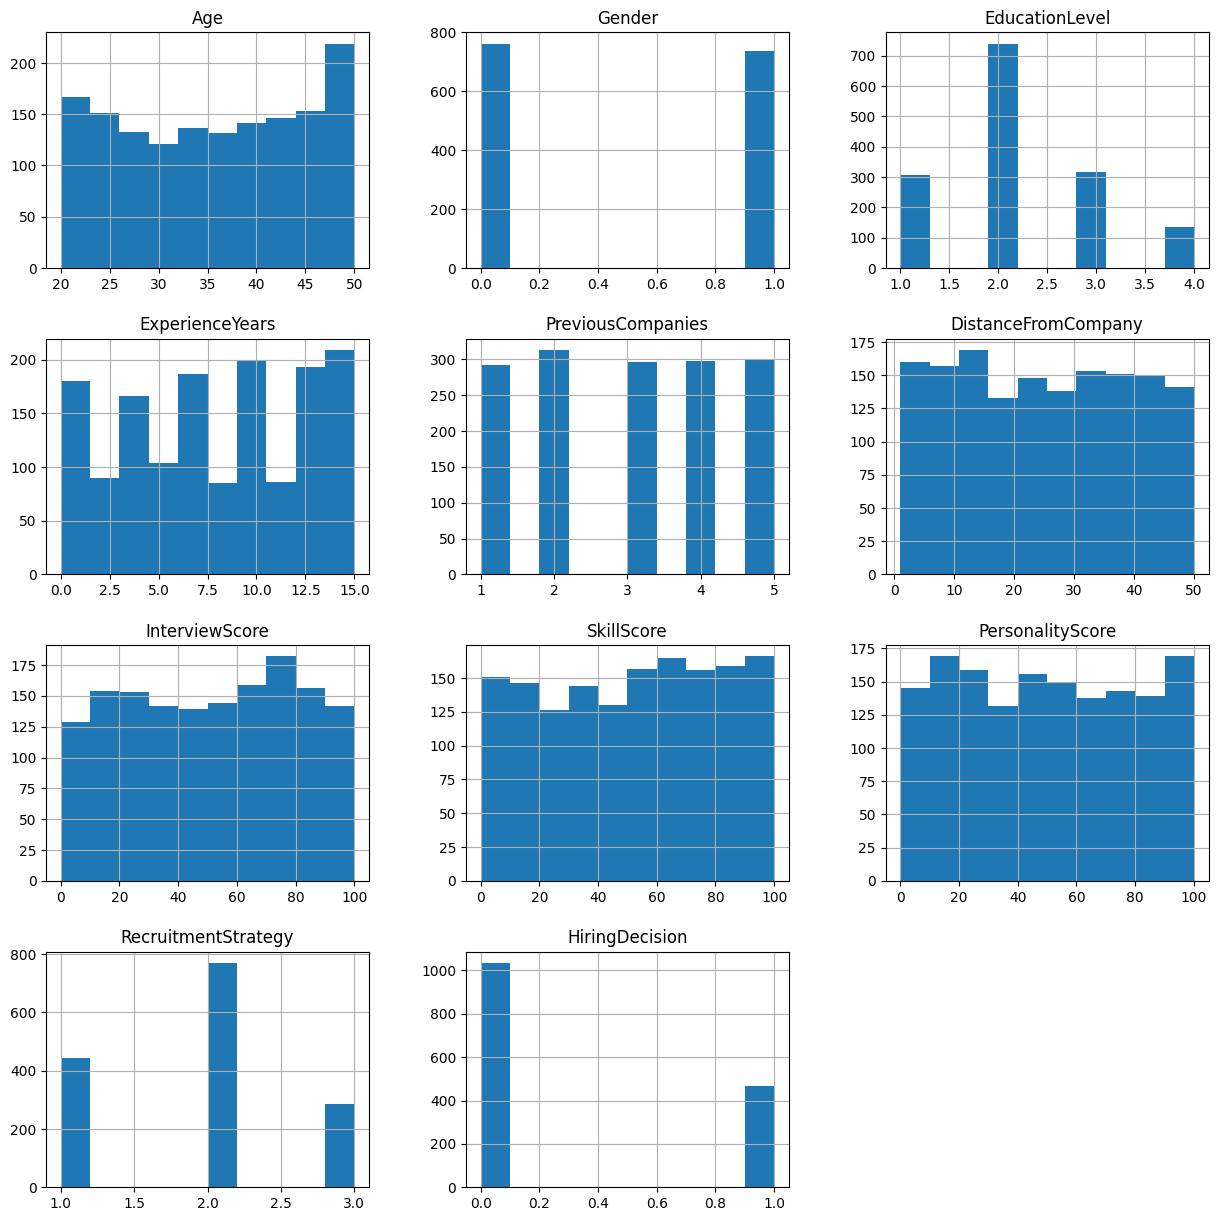

In [21]:
#plotting each column in histogram chart
hiring_dataset.hist(figsize=(15,15))

In [22]:
#statistical information about dataset
hiring_dataset.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.010667,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.569056,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.000000,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.000000,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.000000,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.000000,100.000000,100.000000,100.000000,3.000000,1.000000


UNDERSTANDING THE CORRELATION BETWEEN THE FEATURES OF DATASET

<Axes: >

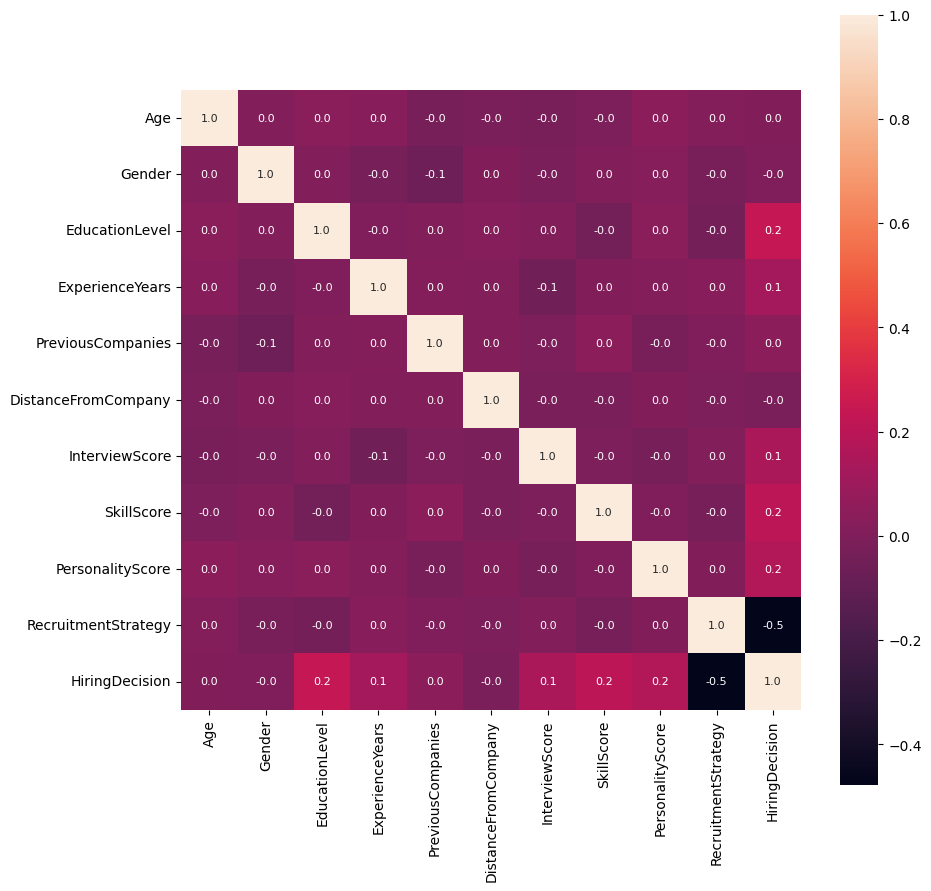

In [51]:
#understanding the correaltion
#positive correlation
#negative correaltion
correlation= hiring_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},
cmap='rocket')


LABEL FOR HiringDecision COLUMN

In [24]:
hiring_dataset['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

0----non- hired
1------hired


STATISTICAL DESCRIPTION ABOUT HiringDecision column

In [25]:
hiring_dataset.groupby('HiringDecision').mean()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
HiringDecision,,,,,,,,,,
0,35.137198,0.492754,2.051208,7.313043,2.960386,25.177778,47.762319,47.110145,46.059903,2.114010
1,35.174194,0.490323,2.492473,8.541935,3.094624,24.638710,56.800000,60.032258,56.793548,1.402151


SPLITTING DATASET INTO FEATURES AND TARGET

In [26]:
#splitting the datset into features and target
X=hiring_dataset.drop(['HiringDecision'],axis=1)
Y=hiring_dataset['HiringDecision']

In [27]:
print(X)

      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0                      26              48       

In [28]:
print(Y)

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64


0-----non-hired
1-------hired

STANDARDIZE THE DATA

In [29]:
#data standardization
hiring_dataset.std()

Age                     9.252728
Gender                  0.500103
EducationLevel          0.862449
ExperienceYears         4.641414
PreviousCompanies       1.410670
DistanceFromCompany    14.569056
InterviewScore         28.626215
SkillScore             29.353563
PersonalityScore       29.353201
RecruitmentStrategy     0.689642
HiringDecision          0.462647
dtype: float64

In [30]:
#standardize the data
scaler=StandardScaler()


In [31]:
scaler.fit(X)

StandardScaler()

In [32]:
standardized_data=scaler.transform(X)

In [33]:
print(standardized_data)

[[-0.9890832   1.01613007 -0.21805656 ...  0.91617383  1.41812626
  -1.29579025]
 [ 0.41637642  1.01613007  2.1016941  ...  0.57538606  1.0432551
   0.15472122]
 [ 1.38938694 -0.98412598 -0.21805656 ...  0.54130729 -1.2400511
   0.15472122]
 ...
 [-1.20530776  1.01613007 -1.37793189 ...  1.35919793  0.29351276
  -1.29579025]
 [ 1.38938694 -0.98412598 -0.21805656 ... -0.48105601 -0.18359599
   0.15472122]
 [-0.12418497  1.01613007 -0.21805656 ... -0.37881968 -0.79702154
   0.15472122]]


In [34]:
features=standardized_data
target=hiring_dataset['HiringDecision']

In [35]:
print(features)

[[-0.9890832   1.01613007 -0.21805656 ...  0.91617383  1.41812626
  -1.29579025]
 [ 0.41637642  1.01613007  2.1016941  ...  0.57538606  1.0432551
   0.15472122]
 [ 1.38938694 -0.98412598 -0.21805656 ...  0.54130729 -1.2400511
   0.15472122]
 ...
 [-1.20530776  1.01613007 -1.37793189 ...  1.35919793  0.29351276
  -1.29579025]
 [ 1.38938694 -0.98412598 -0.21805656 ... -0.48105601 -0.18359599
   0.15472122]
 [-0.12418497  1.01613007 -0.21805656 ... -0.37881968 -0.79702154
   0.15472122]]


In [36]:
print(target)

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64


SPLITTING THE DATA INTO TEST DATA AND TRAINING DATA

In [37]:
 #splitting the dataset into test and  training data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(features.shape,X_train.shape,X_test.shape)

(1500, 10) (1200, 10) (300, 10)


MODEL TRAINING

In [39]:
#model training
classifier=LogisticRegression()


In [40]:
#fitting the training data into  the model
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUATION

In [41]:
#model evaluation
train_data_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,train_data_prediction)

In [42]:
print('the accuracy  score  of training data:',training_data_accuracy)

the accuracy  score  of training data: 0.8691666666666666


In [43]:
#model evaluation on test data
test_data_prediction=classifier.predict(X_test)
test_data_accuracy_score=accuracy_score(Y_test,test_data_prediction)

In [44]:
print("test data accuracy score is:",test_data_accuracy_score)

test data accuracy score is: 0.8466666666666667


### MAKING A PREDICTIVE SYSTEM

In [57]:
#making a predictive system
import numpy as np
input_data=(27,0,3,14,4,31.706658809375902,54,50,50,1)
#changing the  input_data to numpy array
input_data_as_array= np.asarray(input_data)
#reshaping the data
input_data_reshaped=input_data_as_array.reshape(1,-1)


prediction=classifier.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
  print('The person is not hired')
else:
  print('The person is hired')

[1]
The person is hired


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
